### K Means

The K Means algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean \mu_j of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X, although they live in the same space. The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

K-means is often referred to as Lloyd’s algorithm. In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose k samples from the dataset X. After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [3]:
#Gathering Data
credit = pd.read_csv(r"E:/Github/Python/Data-Sets/Risk.txt",sep=",",index_col=False)

In [4]:
#First 5 Rows of Data
credit.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,MORTGAGE,STORECAR,LOANS,RISK
0,100756,44,59944,m,married,1,2,monthly,y,2,0,good risk
1,100668,35,59692,m,married,1,1,monthly,y,1,0,bad loss
2,100418,34,59508,m,married,1,1,monthly,y,2,1,good risk
3,100416,34,59463,m,married,0,2,monthly,y,1,1,bad loss
4,100590,39,59393,f,married,0,2,monthly,y,1,0,good risk


In [5]:
#Selecting Numeric Fields To Be Used In Modelling
X = credit[['AGE','INCOME','NUMKIDS','NUMCARDS','LOANS']]

In [6]:
#Loading Min Max Scaling and Creating New Data Frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [7]:
#Assining Column Names
X_normalized.columns = ['AGE','INCOME','NUMKIDS','NUMCARDS','LOANS']

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

In [27]:
#Assigning cluster centers
centers = kmeans.cluster_centers_
print('Cluster centers of columns:\n')
print(pd.DataFrame(centers,columns= ['AGE','INCOME','NUMKIDS','NUMCARDS','LOANS']))

Cluster centers of columns:

        AGE    INCOME   NUMKIDS  NUMCARDS     LOANS
0  0.769748  0.189718  0.710098  0.821390  0.737514
1  0.288238  0.254709  0.215646  0.227876  0.340025


## How to find optimal cluster number?

The basic idea behind partitioning methods is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. 
The total WSS measures the compactness of the clustering and we want it to be as small as possible.

### 1) Elbow Method:

Method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

Method iteration:
Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
For each k, calculate the total within-cluster sum of square (wss).
Plot the curve of wss according to the number of clusters k.
The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

In [29]:
from sklearn import metrics
from scipy.spatial.distance import cdist

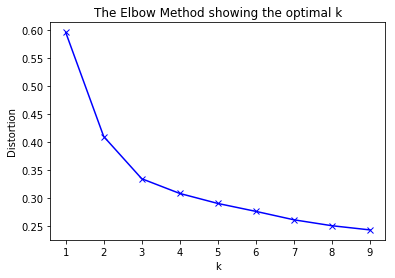

In [30]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_normalized)
    kmeanModel.fit(X_normalized)
    distortions.append(sum(np.min(cdist(X_normalized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_normalized.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### 2) Average Silhouette Method:

It measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering.
Average silhouette method computes the average silhouette of observations for different values of k. 
The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k (Kaufman and Rousseeuw 1990).

Method iteration:
Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 2 to 10 clusters.
For each k, calculate the average silhouette of observations (avg.sil).
Plot the curve of avg.sil according to the number of clusters k.
The location of the maximum is considered as the appropriate number of clusters.

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [33]:
cluster_range = range( 2, 10 )

for n_clusters in cluster_range:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_normalized )

  silhouette_avg = silhouette_score(X_normalized, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_normalized, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.490999089278
For n_clusters = 3 The average silhouette_score is : 0.457867427793
For n_clusters = 4 The average silhouette_score is : 0.362170325574
For n_clusters = 5 The average silhouette_score is : 0.299937562637
For n_clusters = 6 The average silhouette_score is : 0.303322954706
For n_clusters = 7 The average silhouette_score is : 0.286433391541
For n_clusters = 8 The average silhouette_score is : 0.28607844653
For n_clusters = 9 The average silhouette_score is : 0.284778733549
